# Task 1 : Prediction Using Supervised ML

## We have to predict the percentage of an student based on the number of study hours.

#### Author - Shaluka Sinha

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Importing and Understanding the Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### No need of Data Cleaning and Data Preparation Step so, we will directly jump to EDA Process.

### Exploratory Data Analysis - Visualization

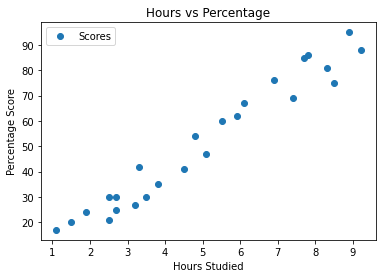

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

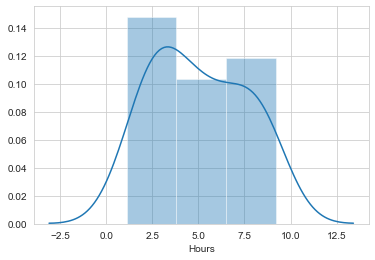

In [8]:
sns.set_style(style='whitegrid')
sns.distplot(df['Hours'])
plt.show()

**From the graph above, we can clearly see that the minimum studying hour is approx 1.25hour and the maximum goes to 9.2 hour. Many of the student study between 1.2hr to 3.75hr.**

### Building Simple Linear Regression Model

In [9]:
# Dividing the Data Set
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3)

In [10]:
print(df_train.shape,df_test.shape)

(17, 2) (8, 2)


In [11]:
# Dividing Data into x and y
x_train=df_train.drop(columns=['Scores'])
y_train=df_train['Scores']

x_test=df_test.drop(columns=['Scores'])
y_test=df_test['Scores']

In [12]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()  
LR.fit(x_train, y_train) 

LinearRegression()

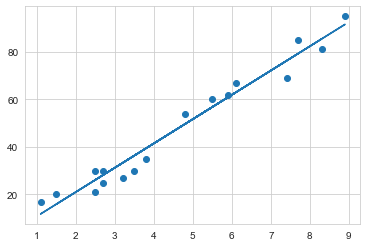

In [13]:
# Plotting the regression line
line = LR.coef_*x_train+LR.intercept_

# Plotting for the test data
plt.scatter(x_train,y_train)
plt.plot(x_train, line);
plt.show()

**From the above graph, we can say that our line of best fit perfectly matches the data points** 

In [14]:
# Accuracy against the training model
LR.score(x_train,y_train)

0.9653837479533768

In [15]:
# Accuracy against the test model(unseen data)
LR.score(x_test,y_test)

0.903265585241123

**Our Training Model accuracy score is 95% and Test Model accuracy score is 94%.As our model accuracy is quite good, now we can make our prediction**

### Model Prediction

In [16]:
# Prediction of model against the test set
y_pred = LR.predict(x_test)

In [17]:
# Comparing Actual vs Predicted
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

,Actual,Predicted
0,75,87.496708
1,47,52.705899
2,24,19.961608
3,88,94.659521
4,41,46.566344
5,42,34.287235
6,76,71.124562
7,86,80.333894


In [18]:
# Predict the required score
hours=[[9.25]]
own_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 95.17115102190671


### Model Evaluation

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.5901465548892375
